# Обзор матричной алгебры

In [3]:
import numpy as np

In [2]:
x = np.array( [1, 2, 3] )
y = np.array( [4, 5, 6] )

### Поэлементные операции с массивами

In [4]:
x + y

array([5, 7, 9])

In [5]:
x * y

array([ 4, 10, 18])

In [6]:
x - y

array([-3, -3, -3])

In [7]:
x / y

array([ 0.25,  0.4 ,  0.5 ])

In [9]:
# элементы массива x возводятся в соответствующие степени элементов массива y
x ** y

array([  1,  32, 729], dtype=int32)

In [12]:
# остаток от деления
# обратите внимание, что для удобства данного примера x и y идут в другом порядке

y % x

array([0, 1, 0], dtype=int32)

### Изменение размерности

In [60]:
x = np.arange( 0, 10 )
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
# 10 - количество строк

x.shape

(10,)

In [3]:
np.array(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
).shape

(3, 2)

In [63]:
# первый аргумент - количество строк
# второй - столбцов

x.reshape( 5, 2 )

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [67]:
# при "неправильном" количестве строк и столбцов будет ошибка

x.reshape( 5, 3 )

ValueError: cannot reshape array of size 10 into shape (5,3)

In [6]:
d = {'a': 1}

In [7]:
d['b']

KeyError: 'b'

In [5]:
# если нужно, чтобы скрипт не вылетал с ошибкой, то можно так:

try:
    x.reshape( 5, 3 )
    x += '1'

except ValueError:
    print( 'Попались кривые данные, идем дальше' )

except Exception as e:
    print( 'Неизвестная ошибка. Останавливаю выполнение' )
    raise e

Попались кривые данные, идем дальше


In [8]:
# транспонирование матриц

np.array(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
).T

array([[1, 3, 5],
       [2, 4, 6]])

In [10]:
# склеивание листов

x = np.array( [ [1, 2, 3], [4, 5, 6] ] )

In [32]:
x.ravel()

array([1, 2, 3, 4, 5, 6])

In [40]:
# можно и так

x.reshape( 6 )

array([1, 2, 3, 4, 5, 6])

In [11]:
# результат разный, если добавить 1 в качестве количества строк

x.reshape( 1, 6 )[0]

array([1, 2, 3, 4, 5, 6])

### Скалярное произведение векторов

\begin{equation*}
\LARGE
\vec{a} \dot{} \vec{b} = |\vec{a}| \space |\vec{b}| \space cos(\vec{a}, \vec{b})
\end{equation*}

Пусть 
\begin{equation*}
\LARGE
\vec{a} = (a_1, a_2, a_3) \\
\LARGE
\vec{b} = (b_1, b_2, b_3)
\end{equation*}

Тогда скалярное произведение векторов равно
\begin{equation*}
\LARGE
\vec{a} \dot{} \vec{b} = a_1 b_1 + a_2 b_2 + a_3 b_3
\end{equation*}

In [12]:
a = np.array( [4, 3] )
b = np.array( [2, 1] )

Пример расчета скалярного произведения векторов

In [13]:
np.dot( a, b )

11

Можно посчитать и таким образом

In [27]:
# первый шаг

for pair in zip( a, b ):
    print( pair )

(4, 2)
(3, 1)


In [28]:
# второй шаг

[ pair[0] * pair[1] for pair in zip( a, b ) ]

[8, 3]

In [29]:
# итоговый результат

sum( [ pair[0] * pair[1] for pair in zip( a, b ) ] )

11

### Косинусное расстояние между векторами

\begin{equation*}
\LARGE
cos(\vec{a}, \vec{b}) = \frac{\vec{a} \dot{} \vec{b}}{|\vec{a}| \space |\vec{b}|}
\end{equation*}

In [14]:
import matplotlib.pyplot as plt

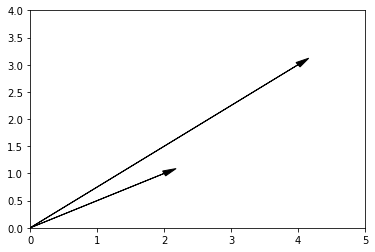

In [15]:
ax = plt.axes()

plt.xlim( [0, 5] )
plt.ylim( [0, 4] )

ax.arrow( 0, 0, a[0], a[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, b[0], b[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )

plt.show()

In [15]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [37]:
# длины векторов можно было посчитать и так

aLength = np.sqrt( (a*a).sum() )
bLength = np.sqrt( (b*b).sum() )

In [38]:
cosine( a, b )

0.98386991009990743

In [40]:
# угол между векторами в радианах

np.arccos( cosine( a, b ) )

0.17985349979247847

In [41]:
# угол между векторами в градусах

np.arccos( cosine( a, b ) ) * 360 / 2 / np.pi

10.304846468766044

## Упражнение

Имеется матрица покупок в интернет-магазине. Столбец А - ID пользователя. Остальные столбцы - количество покупок категорий товаров этим пользователем:

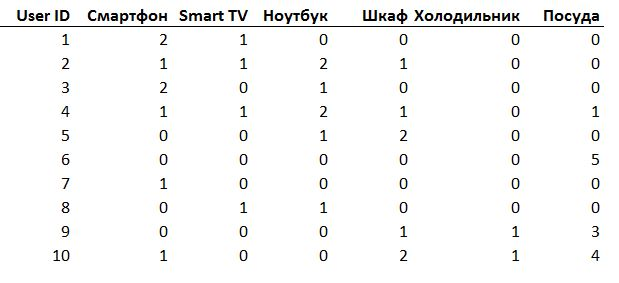

In [1]:
from IPython.display import Image
Image("user_matrix.JPG")

Матрица в виде numpy array

In [9]:
users_stats = np.array(
    [
        [2, 1, 0, 0, 0, 0],
        [1, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 0, 0],
        [1, 1, 2, 1, 0, 1],
        [0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 5],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 3],
        [1, 0, 0, 2, 1, 4]
    ], 
    np.int32
)

На сайт заходит очередной посетитель, о покупках которого известно следующее:

In [11]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])

Посчитайте косинусное расстояние между этим пользователем и всеми пользователями из массива user_stats

### Перемножение матриц

**Определение**

Пусть даны две матрицы a и b размером l x m и m x n соответственно. l - количество строк, n - количество столбцов.

\begin{equation*}
\LARGE
a = 
\begin{bmatrix}
    a_{11} & a_{12} \dots a_{1m} \\
    a_{21} & a_{22} \dots a_{2m} \\
    \vdots & \vdots \dots \vdots \\
    a_{l1} & a_{l2} \dots a_{lm}
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\LARGE
b = 
\begin{bmatrix}
    b_{11} & b_{12} \dots b_{1n} \\
    b_{21} & b_{22} \dots b_{2n} \\
    \vdots & \vdots \dots \vdots \\
    b_{m1} & b_{m2} \dots b_{mn}
\end{bmatrix}
\end{equation*}

Тогда произведением матриц a и b будет матрица c размерностью l x n:

\begin{equation*}
\LARGE
c = 
\begin{bmatrix}
    c_{11} & c_{12} \dots c_{1n} \\
    c_{21} & c_{22} \dots c_{2n} \\
    \vdots & \vdots \dots \vdots \\
    c_{l1} & c_{l2} \dots c_{ln}
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\LARGE
c_{ij} = \sum_{k=1}^m a_{ik} b_{kj}
\end{equation*}

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/1f96c71f0a99eac3ee872e7baf22e84324d7b4c9' style="width: 80%"></img>

In [43]:
a = np.array( 
    [
        [1, 2],
        [3, 4]
    ] 
)

In [44]:
b = np.array( 
    [
        [5, 6],
        [7, 8]
    ] 
)

In [45]:
c11 = 1 * 5 + 2 * 7
c11

19

In [46]:
c12 = 1 * 6 + 2 * 8
c12

22

In [47]:
c = np.dot( a, b )
c

array([[19, 22],
       [43, 50]])

В numpy есть специальный тип matrix, который отличается от ndarray

In [48]:
aMatrix = np.matrix( [ [1, 2], [3, 4] ] )
bMatrix = np.matrix( [ [5, 6], [7, 8] ] )

In [49]:
aMatrix * bMatrix

matrix([[19, 22],
        [43, 50]])

In [50]:
a * b

array([[ 5, 12],
       [21, 32]])

In [51]:
type( aMatrix ), type( a )

(numpy.matrixlib.defmatrix.matrix, numpy.ndarray)

In [52]:
np.mat( a ) * np.mat( b )

matrix([[19, 22],
        [43, 50]])

## Линейные уравнения

Дана система линейных уравнений

\begin{equation*}
\LARGE
x + 3*y = 9 \\
\LARGE
2*x - 4*y = 8
\end{equation*}

In [24]:
# коэффициенты при переменных в левой части уравнения

a = np.array( [ [1, 3], [2, -4] ] )

In [25]:
# значения в правой части уравнения

b = np.array( [9, 8] )

In [27]:
# решение

answer = np.array([6., 1.])
answer

array([ 6.,  1.])

In [28]:
# проверка верности

np.allclose( np.dot( a, answer ), b )

True

## Определитель матрицы

In [2]:
a = np.array( 
    [
        [1, 2],
        [3, 4]
    ]
)

In [3]:
np.linalg.det( a )

-2.0000000000000004

In [4]:
# как получить единичную матрицу

np.eye( 5, dtype = int )

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

## Сингулярное разложение

M - матрица m x n

$\sigma$ является сингулярным числом матрицы M, если существуют два вектора единичной длины u и v такие, что

\begin{equation*}
\LARGE
Mv = \sigma u \\ 
\LARGE
и \space M* u = \sigma v
\end{equation*}

Сингулярное разложение:

\begin{equation*}
\LARGE
M = U \sigma V^*
\end{equation*}